     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
LR 's Accuracy is 0.9733333333333334
DT 

c:\Users\kiate\anaconda3\envs\FedLearning\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RF 's Accuracy is 1.0
GB 's Accuracy is 1.0
ANN 's Accuracy is 0.9733333333333334


c:\Users\kiate\anaconda3\envs\FedLearning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kiate\anaconda3\envs\FedLearning\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\kiate\anaconda3\envs\FedLearning\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

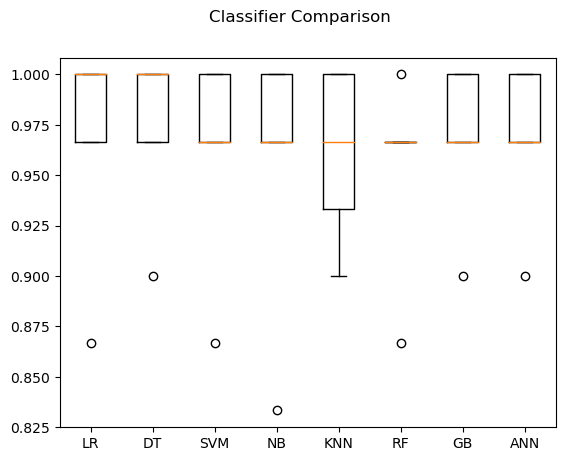

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression #Logistic(Regression)Classifier
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.svm import SVC #Support Vector Machine
from sklearn.naive_bayes import GaussianNB #Naive Bayesian
from sklearn.neighbors import KNeighborsClassifier #K Nearest Neighbor
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.ensemble import GradientBoostingClassifier #Gradient Boosing
from sklearn.neural_network import MLPClassifier #Neural Network
from sklearn.metrics import accuracy_score
from sklearn import model_selection

class ML(object):
    
    def __init__(self, obj_data, model):
        self.data = obj_data
        self.model = model
        
    def prep(self):
        df = pd.DataFrame(data = self.data.data, columns = self.data.feature_names)
        df['target'] = self.data.target
        df['target'] = df['target'].map({0:"setosa",1:"versicolor",2:"virginica"})

        x_data = df.iloc[:, :-1]
        y_data = df.iloc[:, [-1]]
        return x_data, y_data
        
    def train(self, x_data, y_data):
        self.x_data = x_data
        self.y_data = y_data
               
        for name, model in models:
            model.fit(self.x_data, self.y_data.values.ravel())
            y_pred = model.predict(self.x_data)
            print(name, "'s Accuracy is", accuracy_score(self.y_data, y_pred))
            
        return
        
    def cross_validation(self):
        results = []
        names = []
        
        for name, model in models:
            kfold = model_selection.KFold(n_splits=5, random_state=7, shuffle=True)
            cv_results = model_selection.cross_val_score(model, self.x_data, self.y_data.values.ravel(), cv=kfold, scoring="accuracy")
            results.append(cv_results)
            names.append(name)    
            
        fig = plt.figure()
        fig.suptitle('Classifier Comparison')
        ax = fig.add_subplot(111)
        plt.boxplot(results)
        ax.set_xticklabels(names)
        plt.show()       
        
        return
    
    
iris = load_iris()
models = []
models.append(("LR", LogisticRegression()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("SVM", SVC()))
models.append(("NB", GaussianNB()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("GB", GradientBoostingClassifier()))
models.append(("ANN", MLPClassifier()))
ML_test = ML(iris, models)
(x,y) = ML_test.prep()
ML_test.train(x,y)
ML_test.cross_validation()
